# [REvolutionH-tl](https://gitlab.com/jarr.tecn/revolutionh-tl)
**Reconciliation of Evolutionary Histories Tool**

****

Bioinformatics tool for the inference, reconciliation, and analysis of event-labeled genes tree describing the evolutionary history of genes among different genomes. 

# Quick start

Description of how to perform an analysis and data visualization.

First step : [install revolutionhtl](https://gitlab.com/jarr.tecn/revolutionh-tl/-/tree/master/docs/documentation.md#Installation).

Then, create python code describing your analysis. You can write it in your favorite text editor, run the code in a [python interpreter](https://www.python.org/downloads/) or even dowload this notebook and execute it using [jupyter lab](https://jupyter.org/install).

For an example:  [example data here](https://gitlab.com/jarr.tecn/revolutionh-tl/-/tree/master/example_data).

# Import the revolutionhtl package

In [1]:
import revolutionhtl as tl

This package contain classes, and methods required to run the analysis and to explore the results. You can [see the documentation here](https://gitlab.com/jarr.tecn/revolutionh-tl/-/blob/master/docs/documentation.md), or display the description of any module, class or function by typing it followed by a '?', for example

to see pakage documentation type:
```python
tl?
```


to see project documentation type:
```python
tl.Project?
```

to see analysis documentation type:
```python
tl.Project.run_analysis?
```

# Create your project

This object defines the configuration of your analysis and the directory where the results will be saved. You can configure it by calling the project with the different [options described in the documentation](https://gitlab.com/jarr.tecn/revolutionh-tl/-/tree/master/documentation/project#options).

In [2]:
pr= tl.Project(fastas_path= "example_data/",
               fastas_format= "ENSEMBLE",
               orthologs_list= "project/Prt/project.proteinortho-graph",
               proteinortho_p_algorithm= "diamond",
               gene_trees= "project/Trees/",
               species_tree= "example_data/species_tree.newick",
               create= True,
               reset=True
              )

# Run analysis

In [3]:
pr.run_analysis(steps=[1,2,3])

RUNNING BASH COMMAND:  proteinortho6.pl -project=project -verbose -graph -keep -singles -step=0 -p=diamond example_data/Pan_troglodytes.Pan_tro_3.0.pep.all.fa example_data/Gallus_gallus.GRCg6a.pep.all.fa example_data/Mus_musculus.GRCm38.pep.all.fa example_data/Monodelphis_domestica.ASM229v1.pep.all.fa example_data/Homo_sapiens.GRCh38.pep.all.fa example_data/Rattus_norvegicus.Rnor_6.0.pep.all.fa example_data/Danio_rerio.GRCz11.pep.all.fa


100%|██████████| 1184/1184 [00:03<00:00, 385.97it/s]


# Visualize results

Reconciliation of a set of gene trees in two different charts: "pipe plot" and "numeric plot". depicting the genes present at each ancient or existing species of the species tree, clado-specific gene families, as well as the taxes where gene duplication and gene loss occurs.

The pipe plot shows gene trees inside the species tree, while the numeric plot displays the number of genes and events of each category.

First,  import the visualization modules:

In [4]:
from revolutionhtl import evo_plot as ep
from matplotlib import pyplot as plt

## Prepare your data

You need to load the python object that contains reconciliation data:

In [5]:
forestReconciliation= pr.get_reconciliation()

The reconciliation of all gene trees is in the attribute `forestReconciliation.speciesTree`, while the reconciliation of each gene tree is at the `forestReconciliation.reconciliationTrees` attribute. You can see a detailed description of these objectes at [documentation](). 

Some gene trees are congruents with the species tree while others do not. You can use the method below to get the list of all congruent gene trees IDs:

In [6]:
IDs= forestReconciliation.get_congruent_IDs()

So you can choose between plot the reconciliation of all the gene trees:

In [7]:
all_reconciliations= forestReconciliation.speciesTree

or the reconciliation of a specific gene tree:

In [8]:
tree_ID= IDs[0] # Selects the first ID of the list
reconciliation_of_a_tree= forestReconciliation.reconciliationTrees[ tree_ID ]

print("The selected ID is: '", tree_ID, "'" )

The selected ID is: ' 0 '


## Numeric plot

In the left is shown the reconciliation tree, in blue numbers...

In [9]:
fig= ep.plot_recon_upSet(forestReconciliation,figsize=(20,10), rect_left=(-1,0.135,1,0.37), title="Numeric reconciliation plot")

# Fix the figure size:
plt.gcf().set_size_inches(7, 10)

## Pipe plot



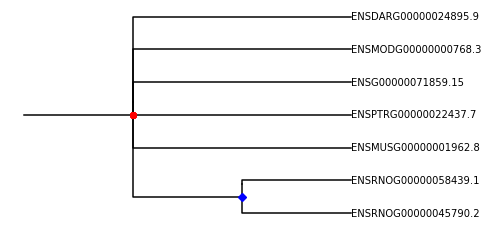

In [10]:
T= forestReconciliation.reconciliationTrees[tree_ID]
t= forestReconciliation.geneTrees[tree_ID]

ep.PlotTree(t,figsize=(5,3))
ep.plot_pipe_recon(t, T)


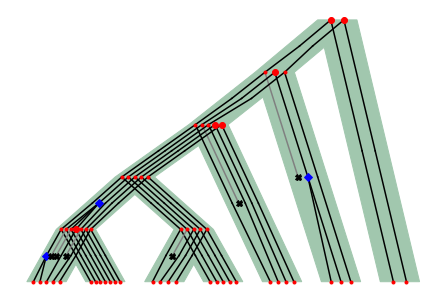

In [11]:
ep.plot_pipe_2(forestReconciliation,subset=IDs[:5])


# Save and analyze data subsets

## Save project as...

When running an analysis with a significant amount of data, python may get slower. Sometimes it is required to compare the results of the analysis over different subsets of data. In this case, save that subset of data as a new project and avoid python to get slower.

To do this,  use the 'save_as' attribute, you can pass any option to change the project configuration.

At least 'project_name' or/and 'project_path' options should be changed. Also you can pass the "force" option if you want to overwrite.

The cell below is created with the same attributes as the other except by project name ('newProject').

In [12]:
pr.save_as(project_name= "newProject", force=True)

self.__dict__[col]## Define data subset

You need to define the functions that will filter the data.

### genes filter

This function must have tow inputs:

- gene ( str )
- genesdict ( revolutionhtl.Project.loadGenesdict() )

and the output must be boolean (True or False). This function must use the genes dict to determine if an orthogroup will be analyzed (returns True if the orthogroup is accpeted).

Remember: genesdict contains genes information, you can pass that information in a .tsv file. The minimum ammount of information of a gene is its correspondig species. See the [documentation]() for a detailed description.

In the [example data](https://gitlab.com/jarr.tecn/revolutionh-tl/-/tree/master/documentation/exampledata) is an example of a genes dict file which contains 3 columns:

1. genes
2. species
3. is_intronless_gene

In [13]:
pr.genes_dict= "example_data/genesdict.tsv"
genesdict= pr.loadGenesdict(reload=True)

the function defined below acepts all the genes that are intronless genes.

In [14]:
def genes_filter( gene , genesdict ):
    return not genesdict.species[ gene ]=="MusMusculus" or genesdict.is_intronless_gene[ gene ]

### orthogroups filter

Two inputs:

- graph ( networkx.Graph )
- genesdict (  revolutionhtl.Project.loadGenesdict() )

boolean output (True if the orthogroup represented by the graph is accepted).

The function defined bellow accepts an orthogroup if and only if the orthogroup contains at least one mouse intronless gene.

In [15]:
def orthogroups_filter( graph, genesdict ):
    r= False

    for gene in graph.nodes():
        is_mouse_gene= genesdict.species[gene]=="MusMusculus"
        is_intronless_gene= genesdict.is_intronless_gene[gene]

        if( is_mouse_gene and is_intronless_gene ):
            r= True
            break

    return r

Now you can use these two functions to create the data subset:

In [16]:
pr.get_subSet( genes_filter, orthogroups_filter )

At this moment the project parameters changed are:

- projet_name
- genes_dict

So if you re-run step 2, graphs will be taken form the project "project" and the results will be saved in the project "newProject"

In [17]:
pr.run_analysis(steps=[2,3])

100%|██████████| 447/447 [00:00<00:00, 555.24it/s]


In [18]:
forestReconciliation= pr.get_reconciliation()
forestReconciliation.speciesTree.weighted=True

In [19]:
IDs= forestReconciliation.get_congruent_IDs()

In [20]:
fig= ep.plot_recon_upSet(forestReconciliation,figsize=(20,10), rect_left=(-1,0.135,1,0.37), title="Numeric reconciliation plot")

# Fix the figure size:
plt.gcf().set_size_inches(7, 10)

In [21]:
df=tl.pd.read_csv("example_data/genesdict.tsv",sep="\t")

In [22]:
ep.plot_pipe_2(forestReconciliation,subset=IDs[:20])
plt.gcf().set_size_inches(20, 10)